# Juan Daniel Sarmient Abello

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

tamaño y tipo (750, 1000, 3) uint8


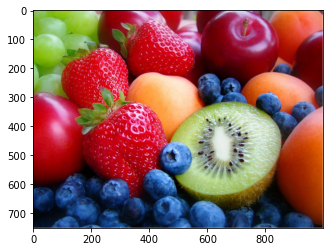

In [2]:
imgSpk3 = cv2.imread('frutas.jpg')
img1RGB = cv2.cvtColor(imgSpk3,cv2.COLOR_BGR2RGB)
tamaño = img1RGB.shape
tipo = img1RGB.dtype
plt.imshow(img1RGB)
print('tamaño y tipo',tamaño,tipo)


In [3]:
# Creamos una copia para poderla manipular a nuestro antojo.
img1RGB_copy = np.copy(img1RGB)

In [4]:
pixel_values = img1RGB_copy.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [5]:
# Abajo estamos aplicando K-Means. Como siempre, OpenCV es un poco complicado en su sintaxis, así que vamos por partes.
 
# Definimos el criterio de terminación del algoritmo. En este caso, terminaremos cuando la última actualización de los
# centroides sea menor a *epsilon* (cv2.TERM_CRITERIA_EPS), donde epsilon es 1.0 (último elemento de la tupla), o bien
# cuando se hayan completado 10 iteraciones (segundo elemento de la tupla, criterio cv2.TERM_CRITERIA_MAX_ITER).


In [6]:
stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [7]:
# Este es el número de veces que se correrá K-Means con diferentes inicializaciones. La función retornará los mejores
# resultados.
number_of_attempts = 10
# Esta es la estrategia para inicializar los centroides. En este caso, optamos por inicialización aleatoria.
centroid_initialization_strategy = cv2.KMEANS_RANDOM_CENTERS

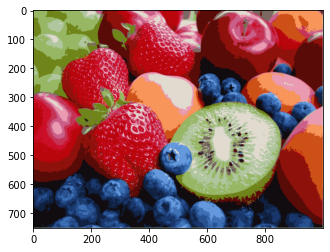

In [8]:
_, labels, centers = cv2.kmeans(pixel_values,
                                20,
                                None,
                                stop_criteria,
                                number_of_attempts,
                                centroid_initialization_strategy)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(img1RGB_copy.shape)
plt.imshow(segmented_image )

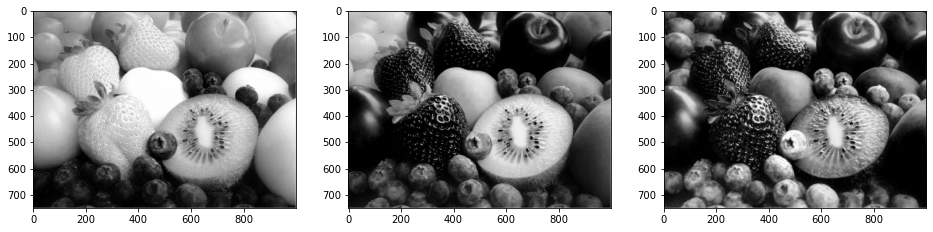

In [9]:
R,G,B = cv2.split(img1RGB_copy)
figure, ax = plt.subplots(1, 3, figsize=(16, 8))

ax[0].imshow(R, cmap='gray')
ax[1].imshow(G, cmap='gray')
ax[2].imshow(B, cmap='gray')

In [10]:

matriZR = np.ones(R.shape, dtype='uint8')*5
matriZG = np.ones(G.shape, dtype='uint8')*5
matriZB = np.ones(B.shape, dtype='uint8')*5

#Aumeto el brillo en la imgen en escala de grices
R_Mas = cv2.add(R, matriZR)
G_Mas = cv2.add(G, matriZG)
B_Mas = cv2.add(B, matriZB)

#Redicimos el brillo en la imgen en escala de grices
R_Men = cv2.subtract(R, matriZR)
G_Men = cv2.subtract(G, matriZG)
B_Men = cv2.subtract(B, matriZB)


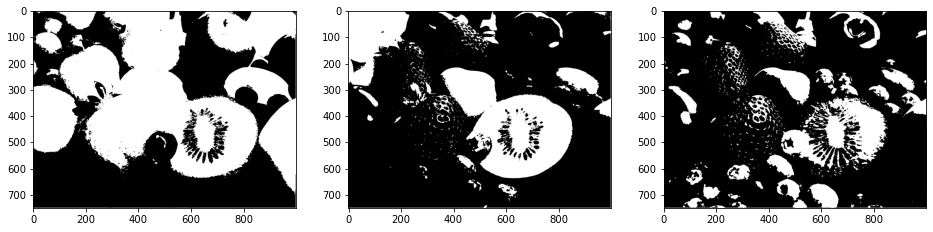

In [11]:
_, imgthreR = cv2.threshold(R_Mas,150,255, cv2.THRESH_BINARY)
_, imgthreG = cv2.threshold(G_Mas,150,255, cv2.THRESH_BINARY)
_, imgthreB = cv2.threshold(B_Mas,150,255, cv2.THRESH_BINARY)

figure, ax = plt.subplots(1, 3, figsize=(16, 8))

ax[0].imshow(imgthreR, cmap='gray')
ax[1].imshow(imgthreG, cmap='gray')
ax[2].imshow(imgthreB, cmap='gray')

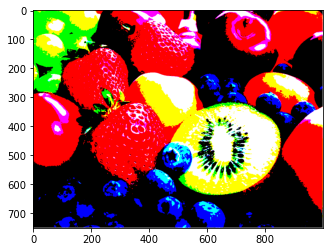

In [245]:
ImRGB = cv2.merge((imgthreR,imgthreG,imgthreB));

plt.imshow(ImRGB)

## Se utilizo la metrica de la intersección sobre la unión

In [248]:
Inter = cv2.bitwise_and(segmented_image,ImRGB)
unio = cv2.bitwise_or(segmented_image,ImRGB)
#IoU = Inter//unio
Inter_M = np.linalg.norm(Inter)
unio_M = np.linalg.norm(unio)
IoU = (float(Inter_M)/float(unio_M))
print(IoU)

0.6933465931241508


In [274]:
from skimage import io
from skimage.color import label2rgb
from skimage.segmentation import slic
from skimage import data, segmentation, color
from skimage.future import graph
from skimage.data import astronaut

In [283]:
img = astronaut()
#slic
labels1 = slic(img,10,10,sigma=1,enforce_connectivity=True)
out1 = color.label2rgb(labels1, img,kind='avg')

#Ncut

g=graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1,g)
out2 = color.label2rgb(labels2, img,kind='avg')

/tmp/ipykernel_48045/531819610.py:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  labels1 = slic(img,10,10,sigma=1,enforce_connectivity=True)
/tmp/ipykernel_48045/531819610.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  out1 = color.label2rgb(labels1, img,kind='avg')
/tmp/ipykernel_48045/531819610.py:10: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  out2 = color.label2rgb(labels2, img,kind='avg')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'NCut'), ([], []), ([], []))

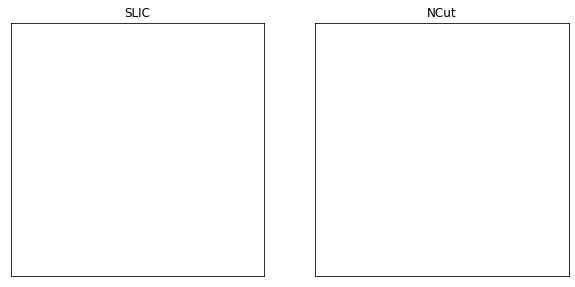

In [284]:
plt.figure(1,figsize=(10,5))
plt.subplot(121),plt.imshow(out1,cmap='gray')
plt.title('SLIC'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(out2,cmap='gray')
plt.title('NCut'),plt.xticks([]),plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


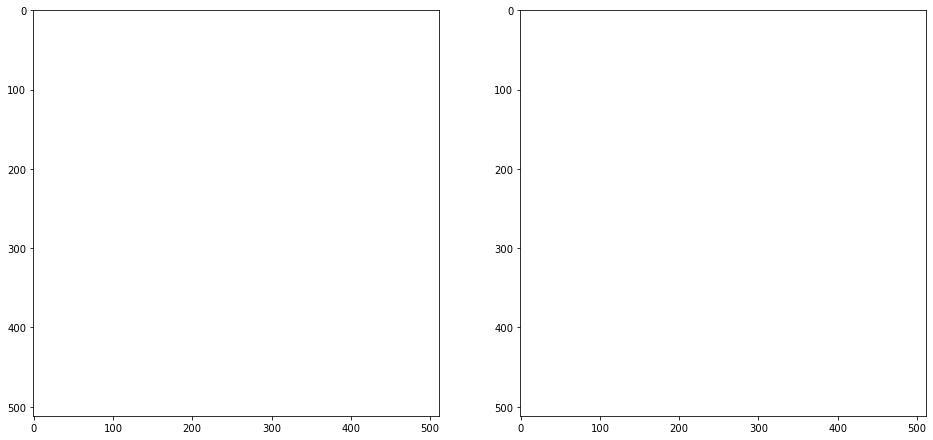

In [285]:
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(out1, cmap='gray')
ax[1].imshow(out2, cmap='gray')